In [16]:
#! pip install kneed

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from tqdm import tqdm
from sklearn.cluster import KMeans
from kneed import KneeLocator

warnings.filterwarnings('ignore')

### Plano

- Transformar os plots em subplots
- Adicionar um ou dois métodos de detecção de número de clusters via elbow
- Fazer o cálculo da inércia do paper e plotar
- Implement the Gap metric and compare

## Creating the Datasets

In [3]:
normal_noise = pd.DataFrame()
normal_noise['d1'] = np.random.normal(size=500)
normal_noise['d2'] = np.random.normal(size=500)
normal_noise['target'] = 1

In [4]:
three_blobs = pd.DataFrame()

for loc in [1, 5, 10]:
    aux = pd.DataFrame()
    aux['d1'] = np.random.normal(loc=loc, scale=0.5, size=500)
    aux['d2'] = np.random.normal(loc=loc, scale=0.5, size=500)
    aux['target'] = loc
    
    three_blobs = pd.concat([three_blobs, aux])

In [5]:
overlapping_blobs = pd.DataFrame()

for loc in [1, 3, 5]:
    aux = pd.DataFrame()
    aux['d1'] = np.random.normal(loc=loc, scale=0.8, size=500)
    aux['d2'] = np.random.normal(loc=loc, scale=0.8, size=500)
    aux['target'] = loc
    
    overlapping_blobs = pd.concat([overlapping_blobs, aux])

In [6]:
many_blobs = pd.DataFrame()
for i in range(30):
    loc_1 = i + 3 * np.random.normal(2, 2)
    loc_2 = i + 3 * np.random.normal(2, 2)
    aux = pd.DataFrame()
    aux['d1'] = np.random.normal(loc=loc_1, scale=0.35, size=50)
    aux['d2'] = np.random.normal(loc=loc_2, scale=0.35, size=50)
    aux['target'] = i
    
    many_blobs = pd.concat([many_blobs, aux])

Text(0.5, 1.0, 'Many Blobs')

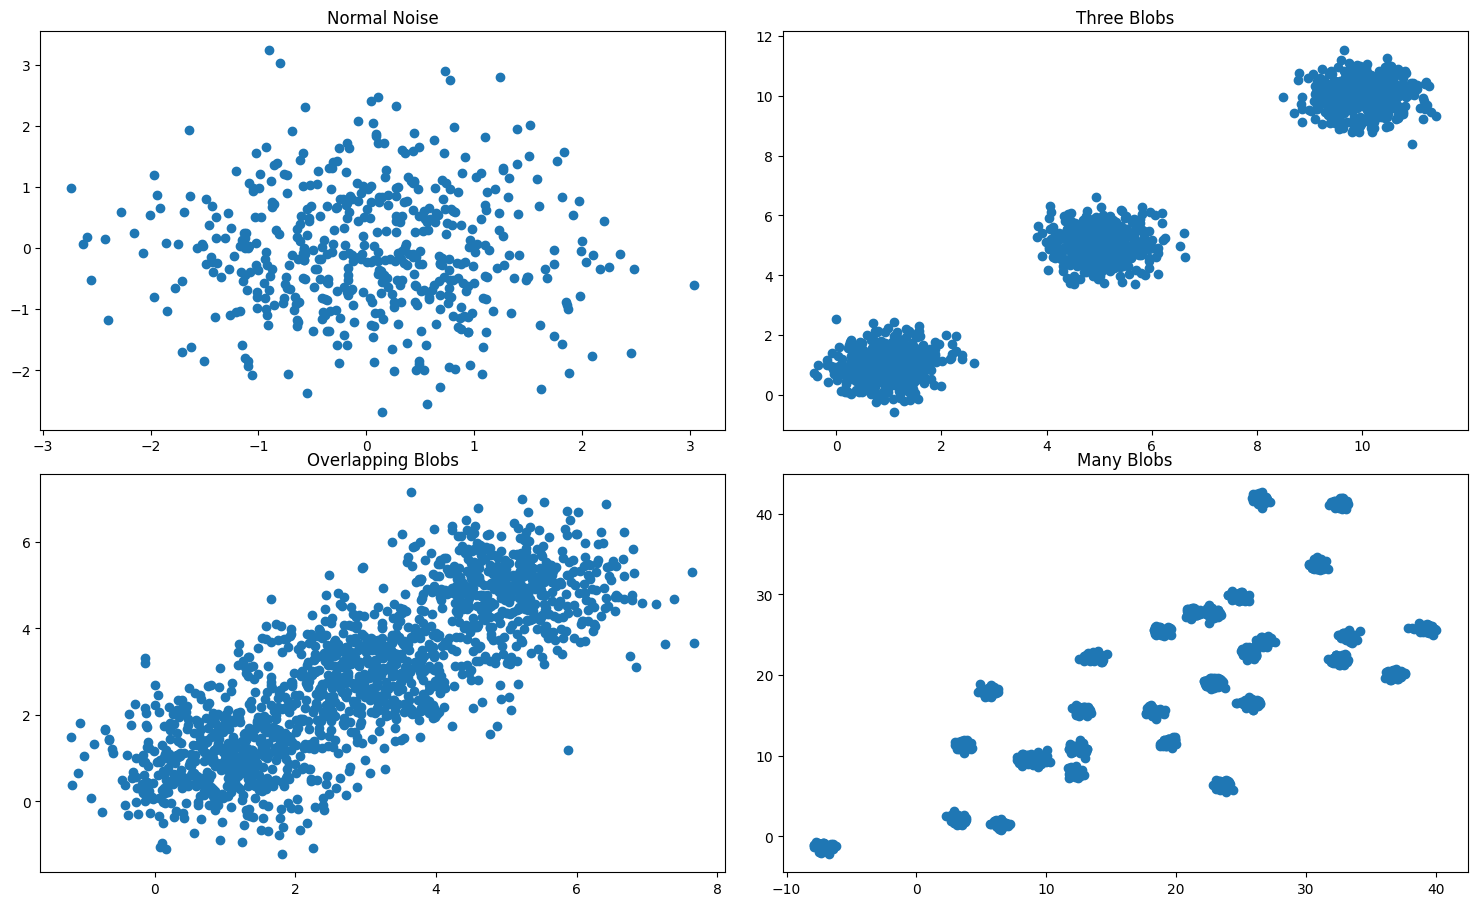

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(15,9))
fig.tight_layout()

axs[0,0].scatter(normal_noise.d1, normal_noise.d2)
axs[0,0].set_title('Normal Noise')

axs[0,1].scatter(three_blobs.d1, three_blobs.d2)
axs[0,1].set_title('Three Blobs')

axs[1,0].scatter(overlapping_blobs.d1, overlapping_blobs.d2)
axs[1,0].set_title('Overlapping Blobs')

axs[1,1].scatter(many_blobs.d1, many_blobs.d2)
axs[1,1].set_title('Many Blobs')

### Plotting the Elbow

100%|██████████| 30/30 [00:00<00:00, 107.89it/s]


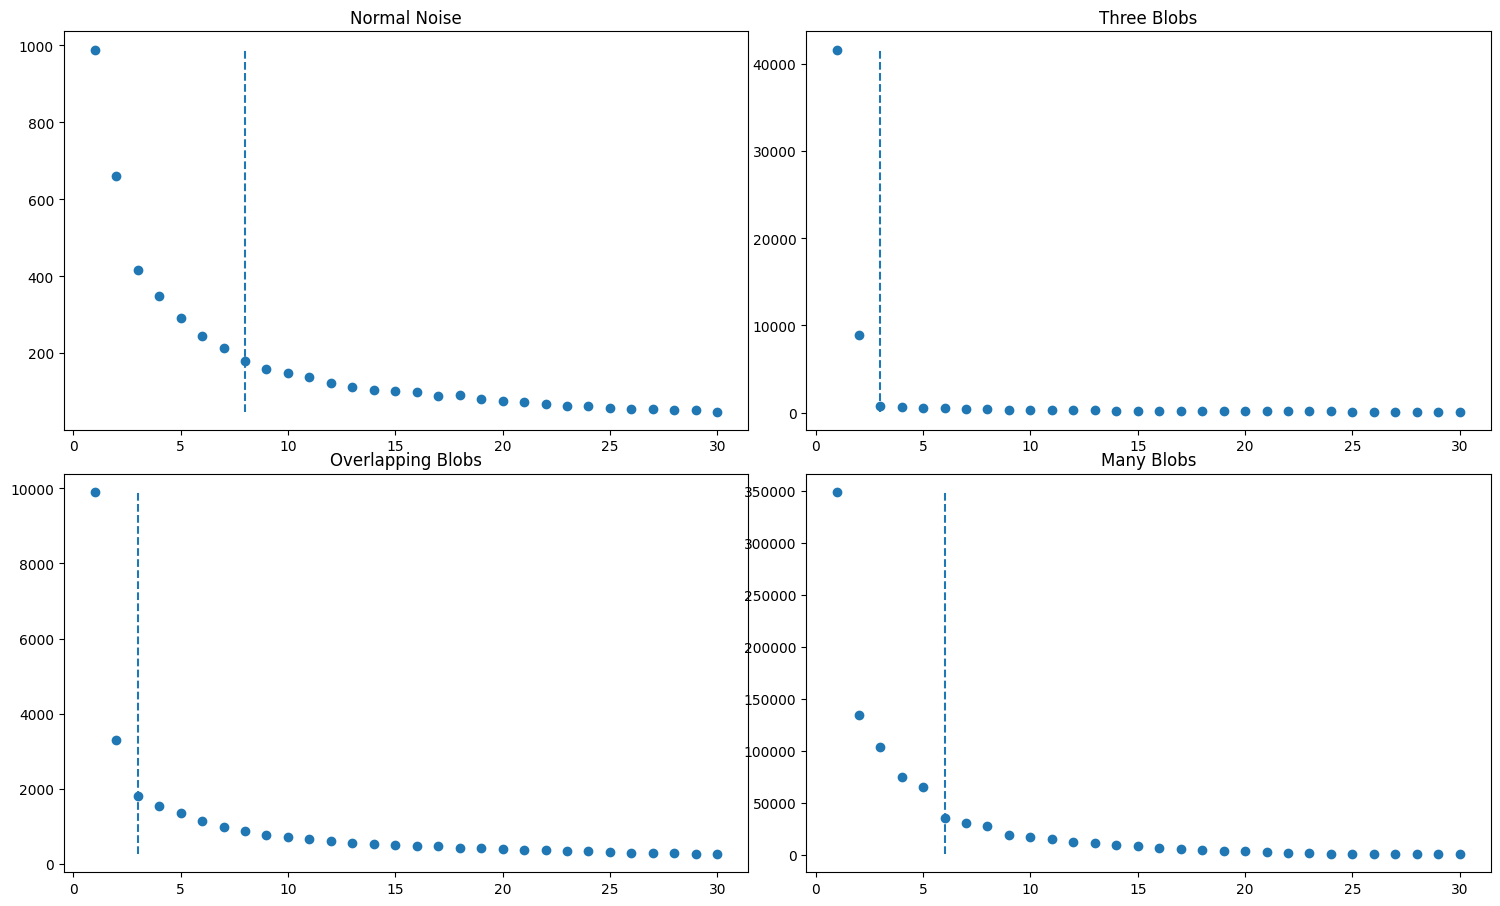

In [22]:
dfs = [normal_noise, three_blobs, overlapping_blobs, many_blobs]
lists = []
knees = []
for i, df in enumerate(dfs):
    inertias = []
    for k in tqdm(range(1,31)):
        model = KMeans(n_clusters=k, n_init='auto')
        model.fit(df.drop(columns=['target']))

        inertias.append(model.inertia_)
    lists.append(inertias)

    kn = KneeLocator([i for i in range(1,31)], inertias, curve='convex', direction='decreasing')
    knees.append(kn.knee)

fig, axs = plt.subplots(2, 2, figsize=(15,9))
fig.tight_layout()

axs[0,0].scatter([i for i in range(1,31)], lists[0])
axs[0,0].set_title('Normal Noise')
axs[0,0].vlines(knees[0], min(lists[0]), max(lists[0]), linestyles='dashed')

axs[0,1].scatter([i for i in range(1,31)], lists[1])
axs[0,1].set_title('Three Blobs')
axs[0,1].vlines(knees[1], min(lists[1]), max(lists[1]), linestyles='dashed')

axs[1,0].scatter([i for i in range(1,31)], lists[2])
axs[1,0].set_title('Overlapping Blobs')
axs[1,0].vlines(knees[2], min(lists[2]), max(lists[2]), linestyles='dashed')

axs[1,1].scatter([i for i in range(1,31)], lists[3])
axs[1,1].set_title('Many Blobs')
axs[1,1].vlines(knees[3], min(lists[3]), max(lists[3]), linestyles='dashed')